# Hello ~~World~~ FIFA 21

Fifa 21 Players Brief
- the most promising
- the best by position
- future free agents

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("cool")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# import datasets
df = pd.read_csv('players_fifa21.csv')
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,33,170,72,https://cdn.sofifa.com/players/158/023/20_60.png,Argentina,93,93,...,93,90,93,69,68,69,65,55,65,22
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,187,83,https://cdn.sofifa.com/players/020/801/20_60.png,Portugal,92,92,...,91,84,91,68,64,68,64,57,64,23
2,200389,J. Oblak,Jan Oblak,27,188,87,https://cdn.sofifa.com/players/200/389/20_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
3,192985,K. De Bruyne,Kevin De Bruyne,29,181,70,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,175,68,https://cdn.sofifa.com/players/190/871/20_60.png,Brazil,91,91,...,91,86,91,70,65,70,65,52,65,23


### Missing data

In [3]:
df.isna().sum().sort_values(ascending=False)[:10]

NationalPosition     17853
NationalNumber       17853
ClubNumber             235
ContractUntil          235
ClubPosition           235
DefensiveWorkRate        0
PreferredFoot            0
IntReputation            0
WeakFoot                 0
SkillMoves               0
dtype: int64

17,853 players are not on the national team and 235 are free agents

## The most promising players

In [4]:
promising_players = df[(df.Growth > 4) & (df.Potential > 84)].sort_values(by='Potential', ascending=False)
print(f'Players find: {promising_players.shape[0]}')

Players find: 247


In [5]:
promising_players[
    ['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR', 'ReleaseClause']
].head(20).style.background_gradient(cmap='cool')

,Name,Age,Overall,Potential,BestPosition,ValueEUR,ReleaseClause
7,K. Mbappé,21,90,95,ST,105500000,203100000
88,K. Havertz,21,85,93,CAM,57000000,119700000
29,J. Sancho,20,87,93,CAM,69500000,132100000
360,João Félix,20,81,93,CAM,32000000,72000000
494,Vinícius Jr.,19,80,93,RM,27500000,73600000
83,G. Donnarumma,21,85,92,GK,41500000,78900000
136,E. Haaland,19,84,92,ST,45000000,85500000
87,M. de Ligt,20,85,92,CB,49500000,91600000
35,T. Alexander-Arnold,21,87,92,RB,60000000,115500000
894,Trincão,20,78,91,CAM,20000000,53500000


In [6]:
promising_players[
    ['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR', 'ReleaseClause']
].corr().style.background_gradient(cmap='cool')

,Age,Overall,Potential,ValueEUR,ReleaseClause
Age,1.000000,0.720234,-0.041513,0.448480,0.414001
Overall,0.720234,1.000000,0.484207,0.842567,0.811650
Potential,-0.041513,0.484207,1.000000,0.718039,0.739560
ValueEUR,0.448480,0.842567,0.718039,1.000000,0.968437
ReleaseClause,0.414001,0.811650,0.739560,0.968437,1.000000


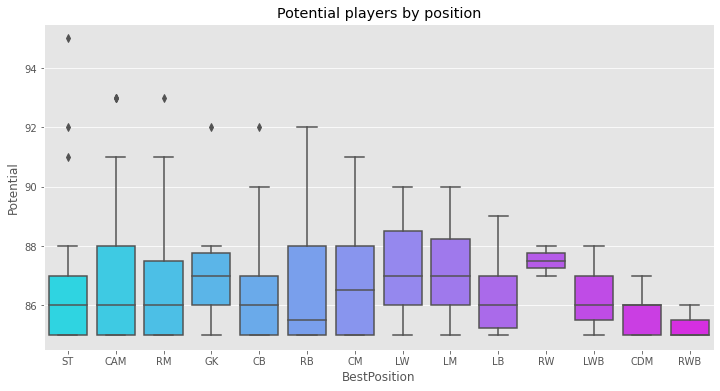

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='BestPosition', 
            y='Potential', 
            data = promising_players, 
            palette='cool'
           ).set_title('Potential players by position');

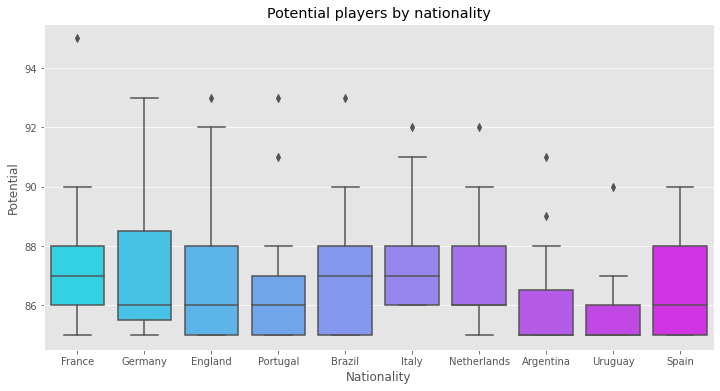

In [8]:
populat_nationality = promising_players.Nationality.value_counts()[:10].keys()
plt.figure(figsize=(12,6))
sns.boxplot(x='Nationality', 
            y='Potential', 
            data = promising_players[promising_players.Nationality.isin(populat_nationality)], 
            palette='cool'
           ).set_title('Potential players by nationality');

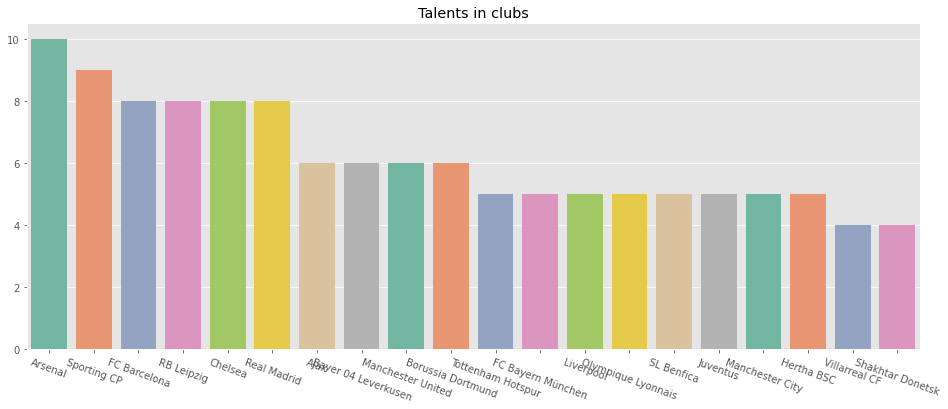

In [9]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=340)
club_count_players = promising_players.Club.value_counts()[:20]
sns.barplot(x=club_count_players.index, 
            y=club_count_players.values,
            palette='Set2'
           ).set_title('Talents in clubs');

In [10]:
from IPython.display import display, HTML
printing_cols =['Name', 'Age', 'Overall', 'Potential', 'Positions', 'ValueEUR', 'ReleaseClause']
for pos in promising_players.BestPosition.unique():
    print(f'Best {pos}')
    display(HTML(promising_players[promising_players.BestPosition == pos][printing_cols].head(5).to_html()))
    print('\n\n')

Best ST


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
7,K. Mbappé,21,90,95,"ST,LW,RW",105500000,203100000
136,E. Haaland,19,84,92,ST,45000000,85500000
134,L. Martínez,22,84,91,ST,44500000,82300000
972,J. David,20,77,88,"ST,CF,CAM",15500000,32600000
320,Richarlison,23,81,88,"ST,RM,LM",25500000,53600000





Best CAM


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
88,K. Havertz,21,85,93,"CAM,RM,CF",57000000,119700000
29,J. Sancho,20,87,93,"RM,LM,CAM",69500000,132100000
360,João Félix,20,81,93,"CF,ST",32000000,72000000
894,Trincão,20,78,91,"RW,LW,CAM",20000000,53500000
132,Oyarzabal,23,84,90,"LW,RW",42500000,97800000





Best RM


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
494,Vinícius Jr.,19,80,93,LW,27500000,73600000
84,M. Rashford,22,85,91,"LM,ST",53000000,111300000
570,Rodrygo,19,79,90,"RW,LW",21000000,47300000
364,Ferran Torres,20,81,89,"RM,LM,CF",26500000,54300000
162,A. Hakimi,21,83,88,RM,35000000,60400000





Best GK


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
83,G. Donnarumma,21,85,92,GK,41500000,78900000
897,Luís Maximiano,21,78,88,GK,13500000,29700000
174,Pau López,25,83,88,GK,25500000,55500000
160,T. Strakosha,25,83,88,GK,25500000,45300000
1707,A. Lunin,21,75,87,GK,9500000,21400000





Best CB


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
87,M. de Ligt,20,85,92,CB,49500000,91600000
549,D. Upamecano,21,79,90,CB,20000000,38000000
128,N. Süle,24,84,89,CB,37500000,64700000
820,I. Konaté,21,78,88,CB,15500000,29500000
889,E. Tapsoba,21,78,88,CB,15500000,29500000





Best RB


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
35,T. Alexander-Arnold,21,87,92,RB,60000000,115500000
890,Emerson,21,78,88,"RB,RM,RWB",15000000,34500000
166,A. Wan-Bissaka,22,83,88,"RB,RWB",30500000,60200000
1103,R. James,20,77,86,"RB,CDM",12500000,26300000
6152,J. Vagnoman,19,69,85,"RB,LM,LB",2100000,4700000





Best CM


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
963,S. Tonali,20,77,91,"CDM,CM",18500000,43000000
179,F. Valverde,21,83,90,CM,36000000,81000000
82,F. de Jong,23,85,90,CM,50500000,107300000
135,Arthur,23,84,89,CM,41000000,70700000
1371,E. Camavinga,17,76,88,CM,12000000,25200000





Best LW


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
1183,Ansu Fati,17,76,90,"LW,RW",15000000,40100000
5406,K. Adeyemi,18,69,87,"ST,LW",2200000,4700000
2312,Gabriel Martinelli,19,74,85,"LW,LM,ST",9500000,20000000





Best LM


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
80,L. Sané,24,85,90,LM,51500000,88800000
362,Cucurella,21,81,89,"LM,LB",26500000,61000000
163,O. Dembélé,23,83,89,"LW,RW",35500000,79900000
1021,M. Edwards,21,77,89,RW,16000000,36800000
2647,A. Urzi,20,73,88,"LM,CM,RM",9000000,19100000





Best LB


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
341,A. Davies,19,81,89,"LB,LM,RM",22500000,41600000
236,Reguilón,23,82,89,"LB,LM",27500000,57800000
168,F. Mendy,25,83,88,LB,30500000,64800000
359,Renan Lodi,22,81,87,LB,21500000,48400000
3675,Nuno Mendes,18,72,87,"LWB,LM",6000000,15800000





Best RW


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
3883,J. Doku,18,71,88,"RW,LW",4900000,10400000
5477,Joelson Fernandes,17,69,87,"RW,LW",2100000,5500000





Best LWB


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
151,Gayà,25,83,88,LB,30500000,66300000
1131,O. Wijndal,20,77,86,LB,12500000,21300000
3570,Nuno Tavares,20,72,85,LB,5500000,14400000





Best CDM


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
557,B. Kamara,20,79,87,"CDM,CB",17000000,35700000
2336,Gustavo Assunção,20,74,86,CDM,9500000,21900000
1179,Florentino,20,76,86,"CDM,CM",11500000,0
552,D. Rice,21,79,86,"CDM,CM",16500000,34700000
527,S. Berge,22,79,86,"CDM,CM",16000000,33600000





Best RWB


,Name,Age,Overall,Potential,Positions,ValueEUR,ReleaseClause
3604,Dodô,21,72,86,RB,6500000,17700000
7961,N. Williams,19,67,85,RB,1500000,3700000
2766,Tomás Tavares,19,73,85,RB,6500000,14300000


## Best by position

In [11]:
print("FIFA is far from real football...")
df.iloc[:, -17:].corr().style.background_gradient(cmap='cool')

FIFA is far from real football...


,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
STRating,1.000000,0.974140,0.988243,0.988243,0.988243,0.974140,0.973440,0.964289,0.917975,0.964289,0.715731,0.641014,0.715731,0.646486,0.491007,0.646486,-0.706263
LWRating,0.974140,1.000000,0.994105,0.994105,0.994105,1.000000,0.992343,0.994319,0.938704,0.994319,0.753964,0.658890,0.753964,0.678081,0.487886,0.678081,-0.716364
LFRating,0.988243,0.994105,1.000000,1.000000,1.000000,0.994105,0.993904,0.986259,0.938037,0.986259,0.730036,0.646893,0.730036,0.654429,0.476343,0.654429,-0.696468
CFRating,0.988243,0.994105,1.000000,1.000000,1.000000,0.994105,0.993904,0.986259,0.938037,0.986259,0.730036,0.646893,0.730036,0.654429,0.476343,0.654429,-0.696468
RFRating,0.988243,0.994105,1.000000,1.000000,1.000000,0.994105,0.993904,0.986259,0.938037,0.986259,0.730036,0.646893,0.730036,0.654429,0.476343,0.654429,-0.696468
RWRating,0.974140,1.000000,0.994105,0.994105,0.994105,1.000000,0.992343,0.994319,0.938704,0.994319,0.753964,0.658890,0.753964,0.678081,0.487886,0.678081,-0.716364
CAMRating,0.973440,0.992343,0.993904,0.993904,0.993904,0.992343,1.000000,0.992297,0.961437,0.992297,0.765819,0.690761,0.765819,0.692423,0.515973,0.692423,-0.696993
LMRating,0.964289,0.994319,0.986259,0.986259,0.986259,0.994319,0.992297,1.000000,0.962366,1.000000,0.806053,0.719685,0.806053,0.735955,0.554857,0.735955,-0.728963
CMRating,0.917975,0.938704,0.938037,0.938037,0.938037,0.938704,0.961437,0.962366,1.000000,0.962366,0.889473,0.852152,0.889473,0.837805,0.704961,0.837805,-0.708083
RMRating,0.964289,0.994319,0.986259,0.986259,0.986259,0.994319,0.992297,1.000000,0.962366,1.000000,0.806053,0.719685,0.806053,0.735955,0.554857,0.735955,-0.728963




Best in ST


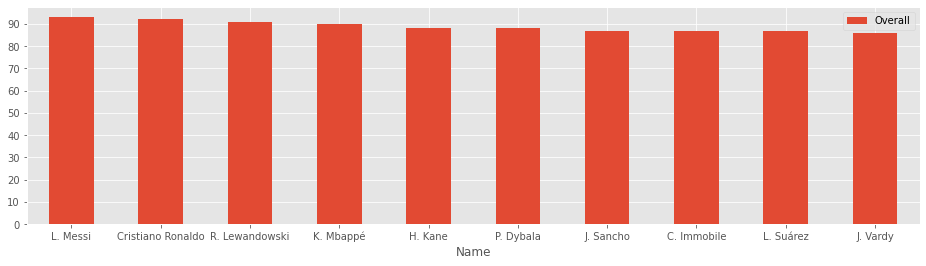



Best in CF


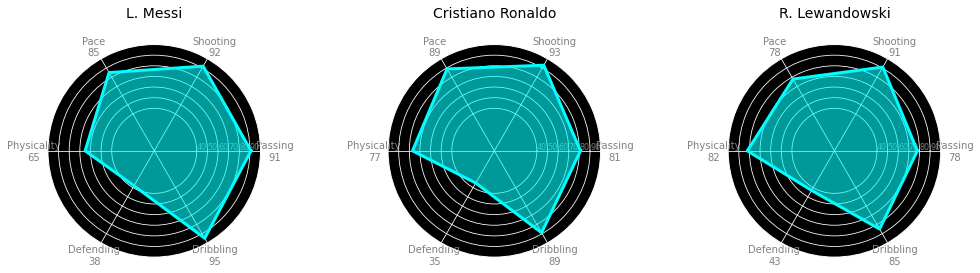

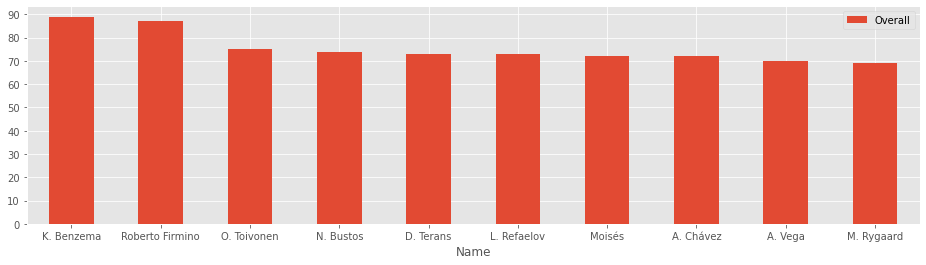



Best in RF


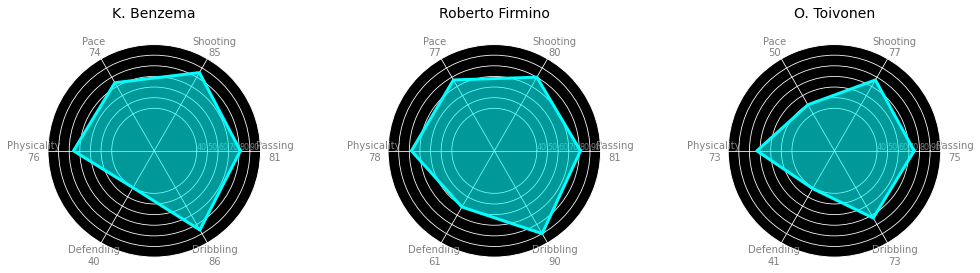

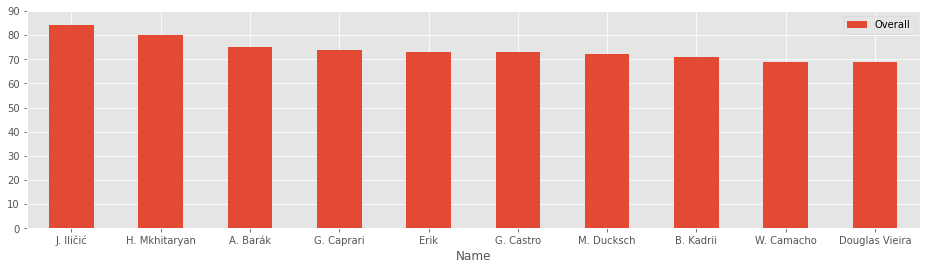



Best in LF


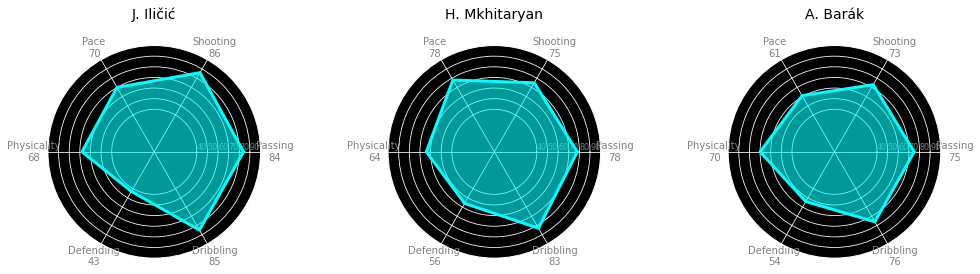

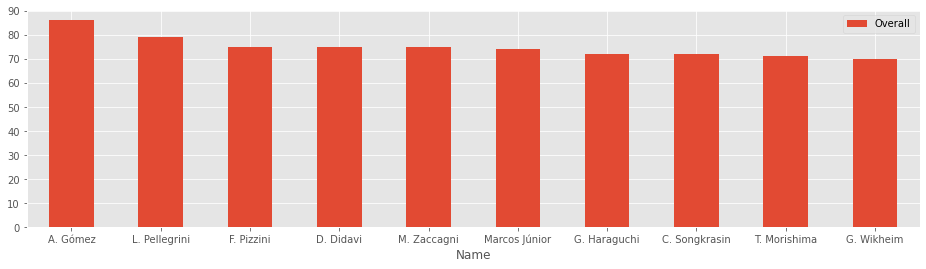



Best in RW


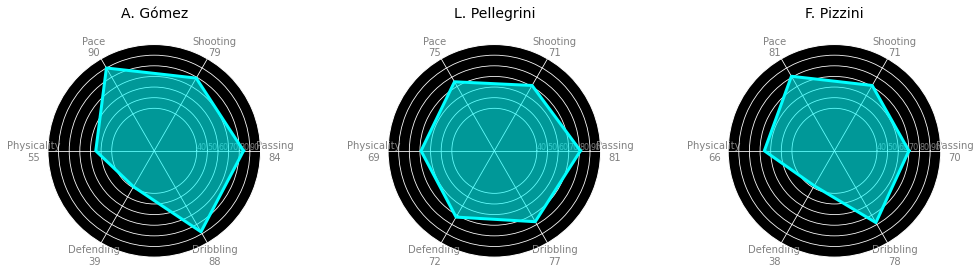

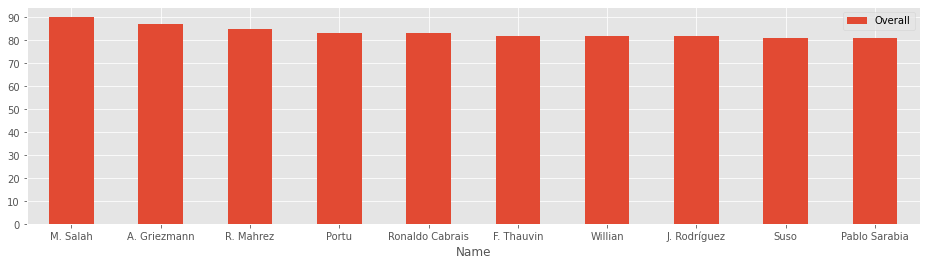



Best in LW


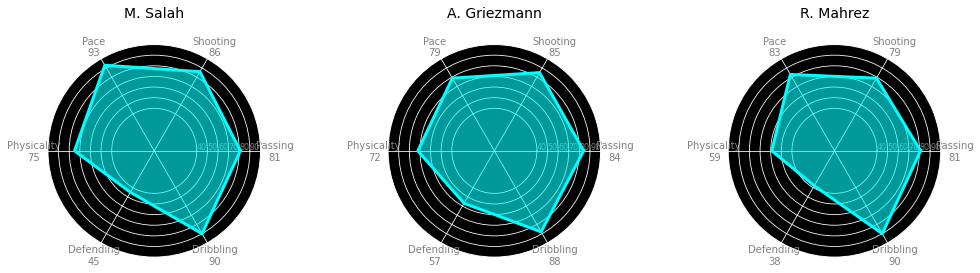

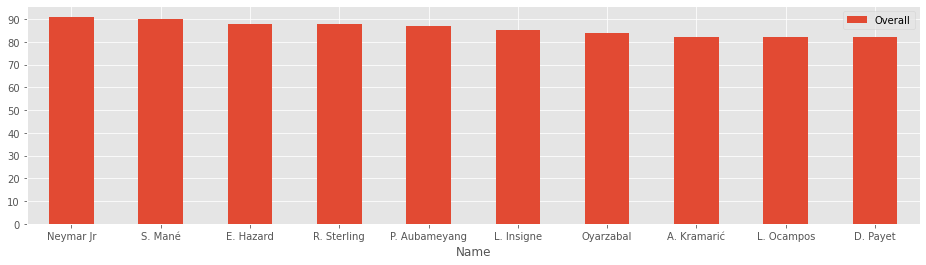



Best in LM


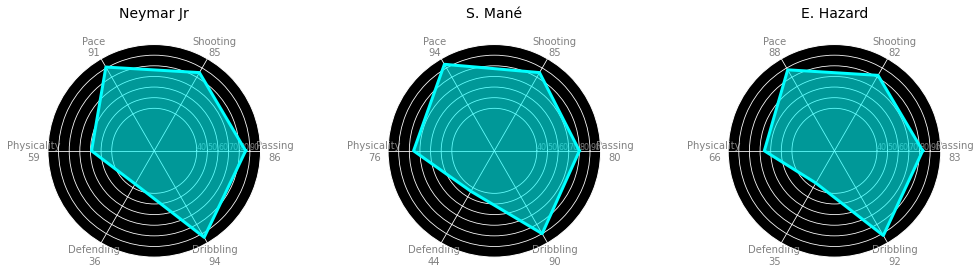

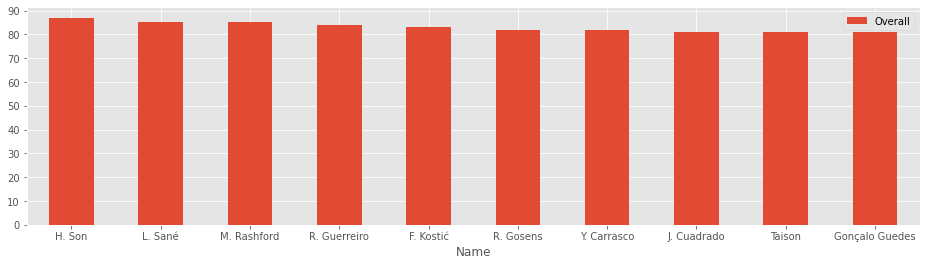



Best in RM


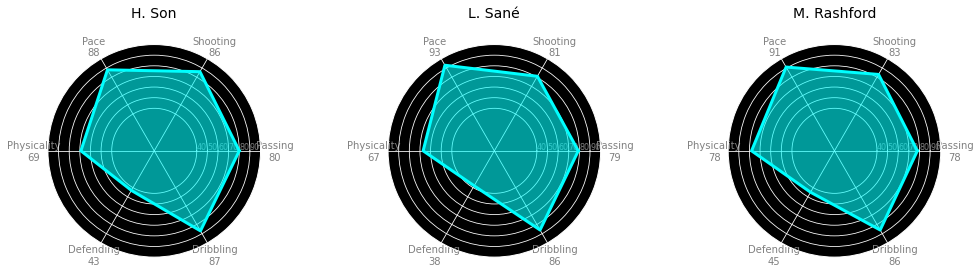

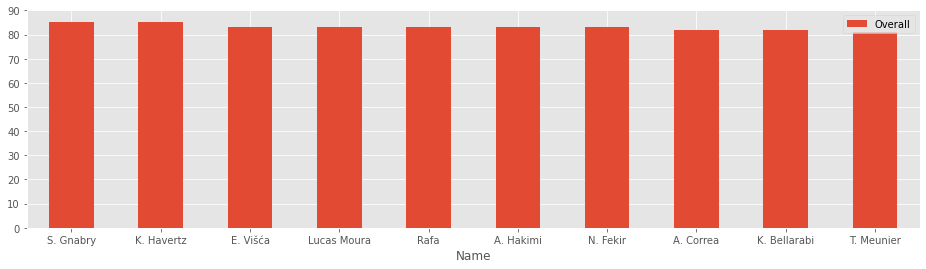



Best in CAM


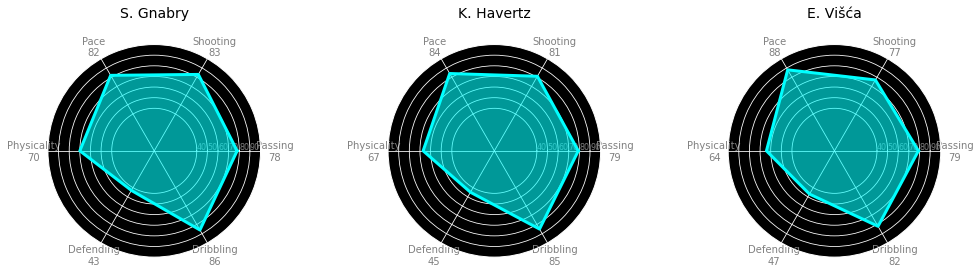

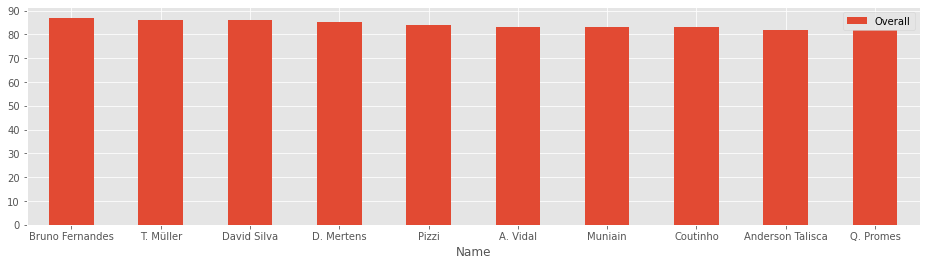



Best in CM


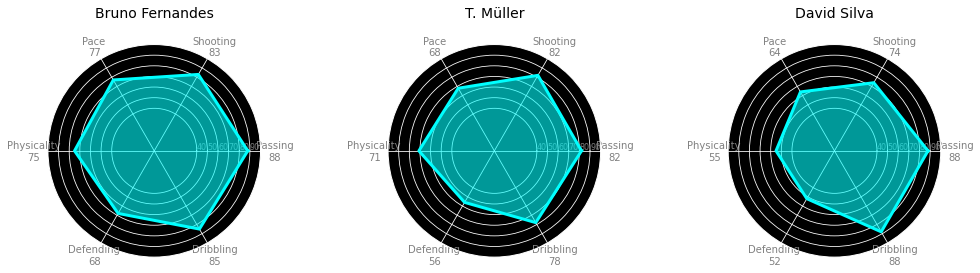

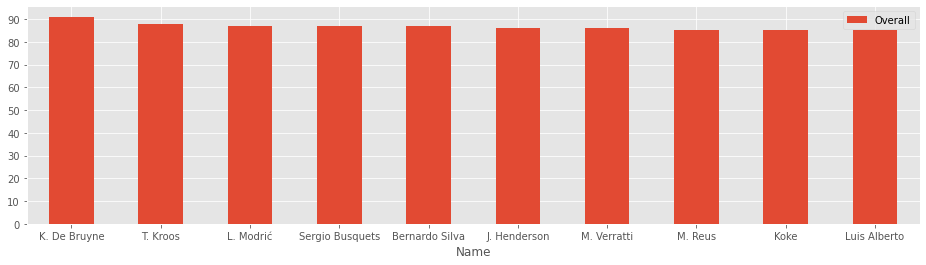



Best in CDM


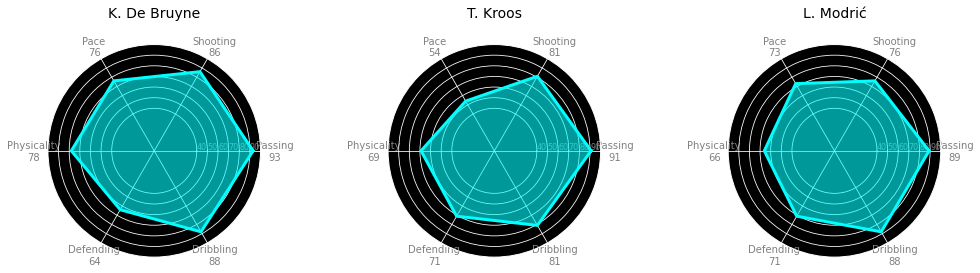

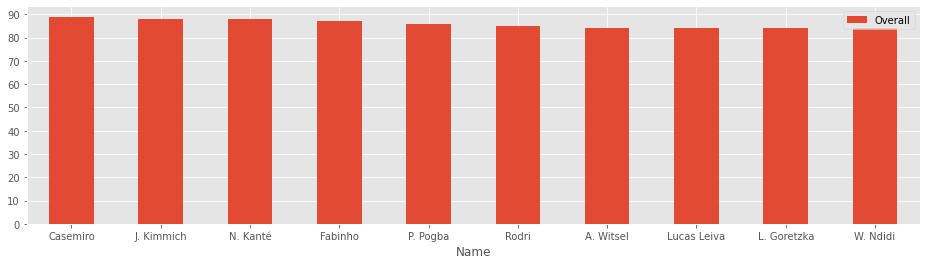



Best in RB


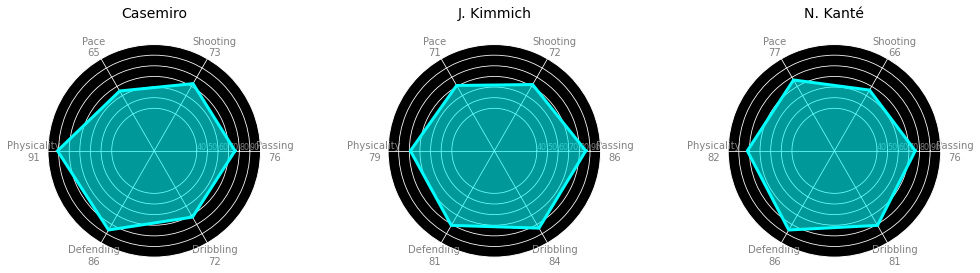

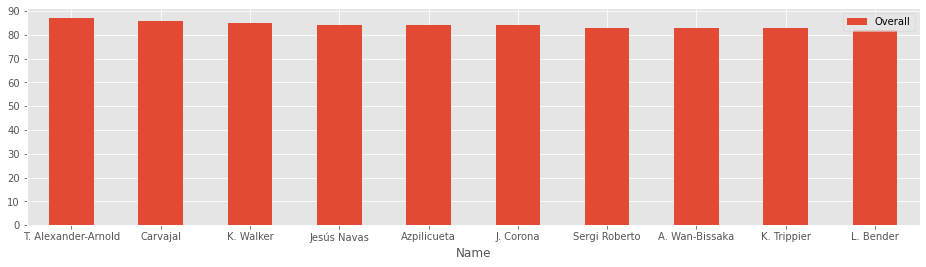



Best in LB


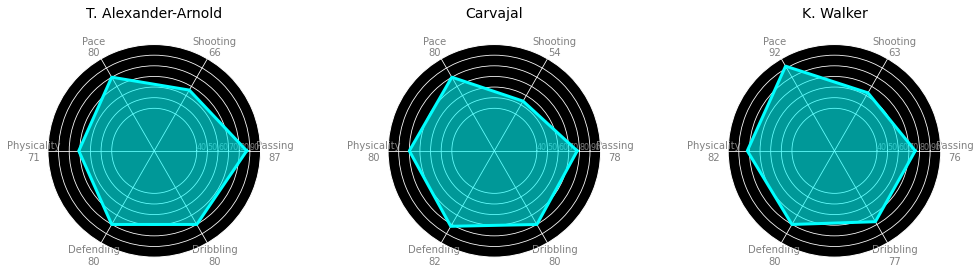

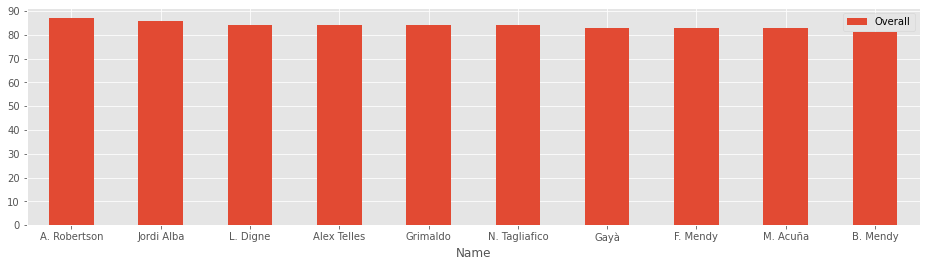



Best in CB


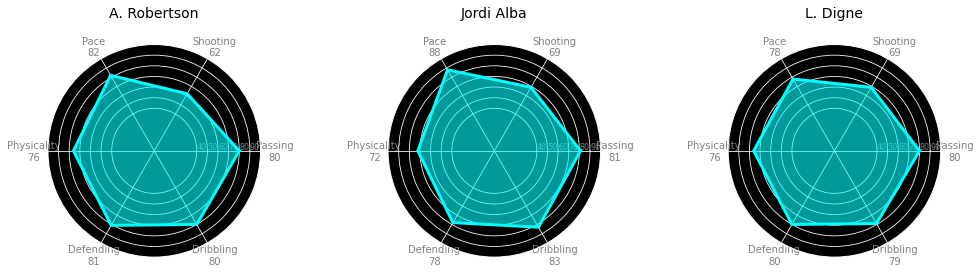

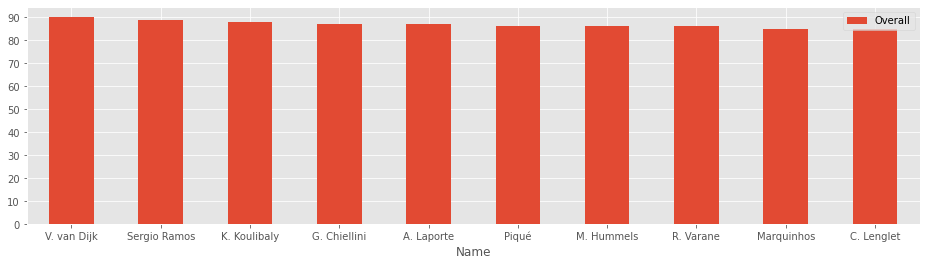



Best in RWB


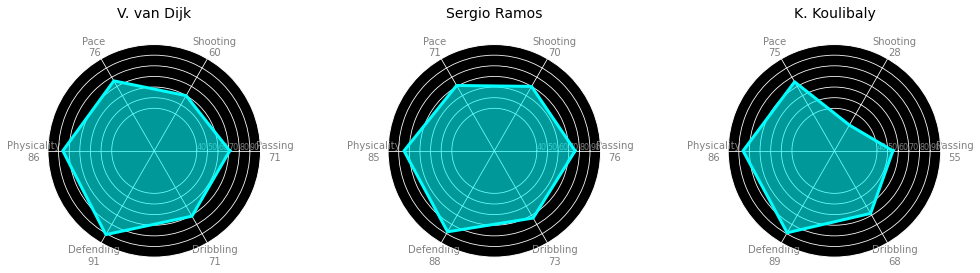

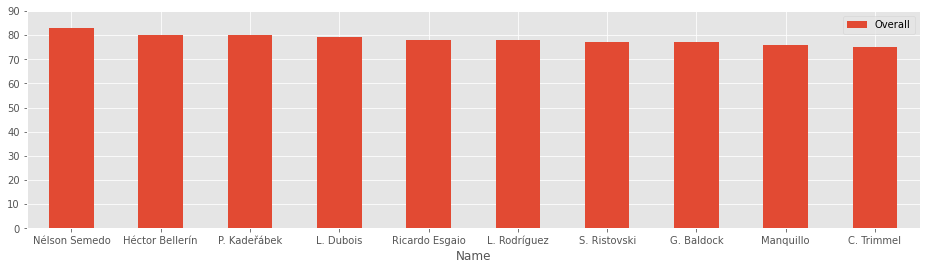



Best in LWB


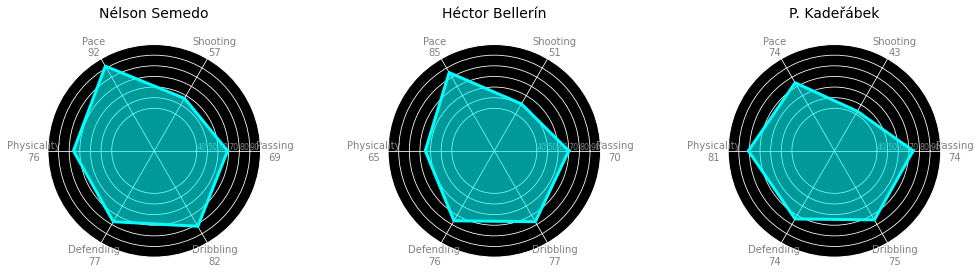

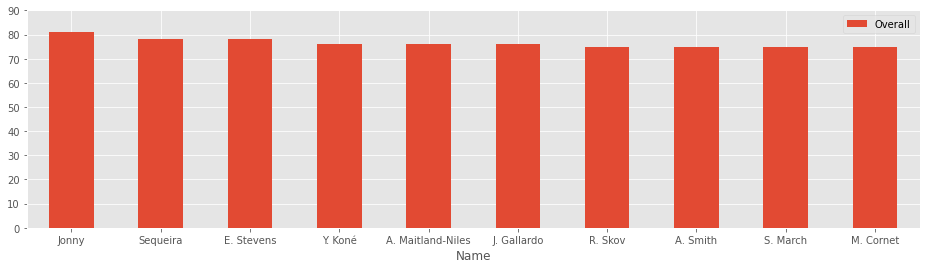



Best in GK


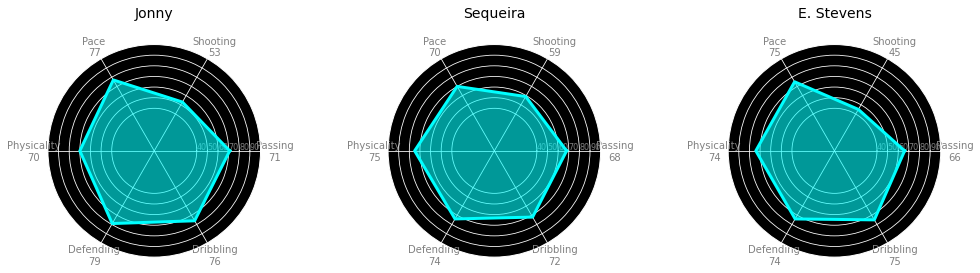

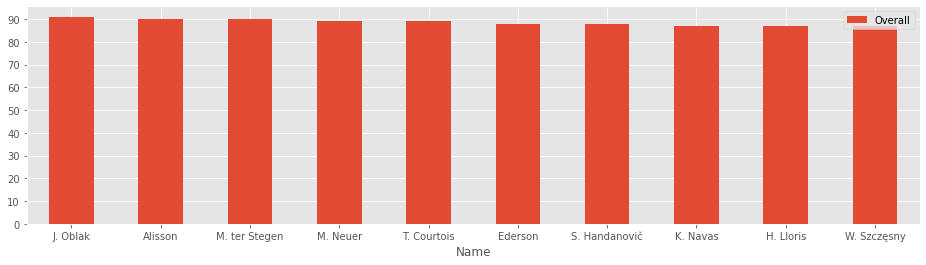

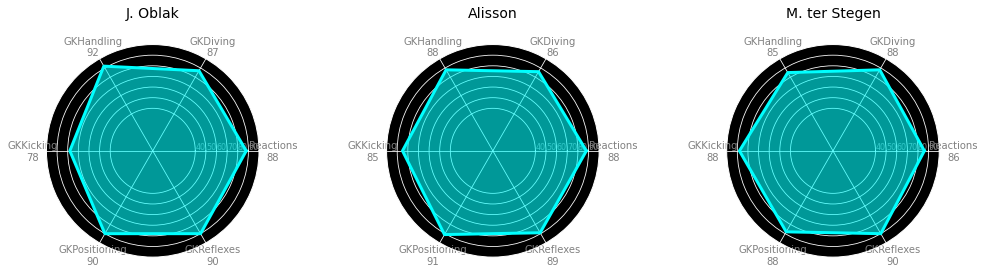

In [12]:
from math import pi

def make_spider(row, i):
    # Create Radar chart
    categories=['PassingTotal', 'ShootingTotal', 'PaceTotal', 
                'PhysicalityTotal',  'DefendingTotal', 'DribblingTotal']
    if row[1].BestPosition == "GK":
        categories=['Reactions', 'GKDiving', 'GKHandling', 
                    'GKKicking', 'GKPositioning', 'GKReflexes']
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(1, 3, i + 1, polar=True)
    plt.subplots_adjust(wspace=0.6)
    xticks_names =  [f"{cat.replace('Total', '')}\n{row[1][cat]}" for cat in categories]
    plt.xticks(angles[:-1], xticks_names, color='grey', size=10)
 
    ax.set_rlabel_position(0)
    ax.set_facecolor('xkcd:black')
    plt.yticks([40, 50, 60, 70, 80, 90], 
               ["40", "50", "60","70","80","90"], 
               color="grey", size=8)
    plt.ylim(0,100)
 

    values=row[1][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='cyan', linewidth=3, linestyle='solid')
    ax.fill(angles, values, color='cyan', alpha=0.6)
 
    plt.title(row[1].Name, size=14, color='black', y=1.1)

positions = ['ST', 'CF', 'RF', 'LF', 'RW', 'LW', 'LM', 'RM', 
             'CAM', 'CM', 'CDM', 'RB', 'LB', 'CB', 'RWB', 'LWB', 'GK']
bar_kwargs = dict(x='Name', y='Overall', figsize=(16,4), yticks=list(range(0, 100, 10)), rot=0)

for pos in positions:
    print(f'\n\nBest in {pos}')
    df[df.ClubPosition==pos][:10].plot.bar(**bar_kwargs);
    plt.show()
    plt.figure(figsize=(16,16))
    for i, row in enumerate(df[df.ClubPosition==pos][:3].iterrows()):
        make_spider(row, i)

# Who are the best future free agents?

In [13]:
df[df.ContractUntil < 2022][
    ['Name', 'Age', 'Overall', 'Potential', 'Positions', 'ContractUntil', 'WageEUR']
][:10].style.background_gradient(cmap='cool')

,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
0,L. Messi,33,93,93,"RW,ST,CF",2021.000000,560000
13,S. Agüero,32,89,89,ST,2021.000000,300000
14,Sergio Ramos,34,89,89,CB,2021.000000,300000
27,S. Handanovič,35,88,88,GK,2021.000000,100000
30,L. Modrić,34,87,87,CM,2021.000000,260000
32,G. Chiellini,35,87,87,CB,2021.000000,94000
36,A. Di María,32,87,87,"RW,LW",2021.000000,160000
55,P. Pogba,27,86,87,"CM,CDM",2021.000000,190000
72,M. Depay,26,85,88,"CF,LW,CAM",2021.000000,115000
83,G. Donnarumma,21,85,92,GK,2021.000000,34000


In [14]:
print('Best under 27')
df[(df.ContractUntil < 2022) & (df.Age < 27)][
    ['Name', 'Age', 'Overall', 'Potential', 'Positions', 'ContractUntil', 'WageEUR']
][:20].style.background_gradient(cmap='cool')

Best under 27


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
72,M. Depay,26,85,88,"CF,LW,CAM",2021.000000,115000
83,G. Donnarumma,21,85,92,GK,2021.000000,34000
286,A. Milik,26,81,84,ST,2021.000000,80000
344,M. Politano,26,81,81,"RM,RW,ST",2021.000000,74000
397,J. Draxler,26,80,81,"CAM,CM,LW",2021.000000,82000
409,Otávio,25,80,83,"RM,CAM,CM",2021.000000,17000
456,Dani Ceballos,23,80,85,"CM,CAM",2021.000000,76000
460,Angeliño,23,80,85,LB,2021.000000,46000
534,C. Pavón,24,79,85,"LW,RW,LM",2020.000000,11000
579,V. Lazaro,24,79,83,"RM,RWB,RB",2021.000000,37000


In [15]:
print('Young and talented')
df[(df.ContractUntil < 2022) & (df.Age < 25) & (df.Growth > 4)][
    ['Name', 'Age', 'Overall', 'Potential', 'Positions', 'ContractUntil', 'WageEUR']
][:20].style.background_gradient(cmap='cool')

Young and talented


,Name,Age,Overall,Potential,Positions,ContractUntil,WageEUR
83,G. Donnarumma,21,85,92,GK,2021.000000,34000
456,Dani Ceballos,23,80,85,"CM,CAM",2021.000000,76000
460,Angeliño,23,80,85,LB,2021.000000,46000
534,C. Pavón,24,79,85,"LW,RW,LM",2020.000000,11000
763,Rony Lopes,24,78,83,"LW,LM",2021.000000,36000
781,R. Borré,24,78,83,ST,2021.000000,19000
814,G. Montiel,23,78,85,"RB,RWB",2021.000000,15000
831,A. Lafont,21,78,84,GK,2021.000000,14000
890,Emerson,21,78,88,"RB,RM,RWB",2021.000000,17000
963,S. Tonali,20,77,91,"CDM,CM",2021.000000,25000


# Anomalies in skill assessment

## Do you remember the speed of Toni Kroos? 41 :)))

In [16]:
def highlight_low(s):
    if s.dtype == 'O':
        return s
    is_low = s <= s.quantile(0.15)
    return ['background-color: hotpink' if v else '' for v in is_low]


rating_columns = ['Name', 'Positions'] + list(df.columns[33:39])

In [17]:
df[df.BestPosition == 'CM'][:10][rating_columns].style.apply(highlight_low)

,Name,Positions,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
23,T. Kroos,CM,54,81,91,81,71,69
30,L. Modrić,CM,73,76,89,88,71,66
55,P. Pogba,"CM,CDM",73,81,86,85,66,85
56,M. Verratti,"CM,CDM",64,60,85,90,79,67
63,Thiago,"CM,CDM",64,72,85,90,70,62
68,Koke,"CM,RM,LM",67,75,85,81,76,80
81,S. Milinković-Savić,"CM,CDM,CAM",69,79,80,83,79,85
82,F. de Jong,CM,80,64,84,87,76,77
89,Parejo,CM,50,83,90,81,71,69
96,G. Wijnaldum,CM,76,75,81,86,78,79


In [18]:
df[df.BestPosition == 'ST'][:10][rating_columns].style.apply(highlight_low)

,Name,Positions,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
1,Cristiano Ronaldo,"ST,LW",89,93,81,89,35,77
5,R. Lewandowski,ST,78,91,78,85,43,82
7,K. Mbappé,"ST,LW,RW",96,86,78,91,39,76
13,S. Agüero,ST,78,90,77,88,33,73
21,H. Kane,ST,68,91,80,80,47,83
31,C. Immobile,ST,84,88,67,83,39,77
34,L. Suárez,ST,70,90,82,83,51,83
39,P. Aubameyang,"ST,LW",93,86,75,80,38,69
40,A. Griezmann,"ST,CF,LW",79,85,84,88,57,72
59,J. Vardy,ST,88,85,66,78,55,75


In [19]:
df[df.BestPosition == 'CB'][:10][rating_columns].style.apply(highlight_low)

,Name,Positions,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
10,V. van Dijk,CB,76,60,71,71,91,86
14,Sergio Ramos,CB,71,70,76,73,88,85
20,K. Koulibaly,CB,75,28,55,68,89,86
32,G. Chiellini,CB,66,46,58,60,90,79
45,A. Laporte,CB,63,50,72,68,88,81
49,Piqué,CB,57,61,71,67,86,80
50,M. Hummels,CB,58,58,77,72,89,77
57,R. Varane,CB,82,49,64,64,87,82
75,Marquinhos,"CB,CDM",72,41,73,70,87,78
79,C. Lenglet,CB,74,45,67,65,87,81





Thank you for watching. Dataset from https://www.kaggle.com/cashncarry/fifa-21-players-teams-full-database